# Which Laptop Should I Pick
 


## ชุดข้อมูล

[Laptopdata](https://www.kaggle.com/datasets/dhanushbommavaram/laptop-dataset?resource=download) เป็นชุดข้อมูลคอมพิวเตอร์พกพาที่รวบรวมมาจาก [www.flipkart.com](https://www.flipkart.com/) โดยเป็นเว็บไซต์ขายของออนไลน์ในอินเดีย

ข้อมูลที่นำมาใช้ประกอบด้วย :
* `name` : ชื่อของโน๊ตบุ๊ค
* `Price` : ราคาของโน๊ตบุ๊คโดยจะเป็นราคาประมาณจากหน่วยรูปีโดยใช้อัตราแลกเปลี่ยนที่ 1 INR = 0.46 THB
* `Type` : ประเภทของโน๊ตบุ๊ค
* `Processor_Name` : รุ่นของ CPU ที่โน๊ตบุ๊คใช้
* `SSD_Capacity(GB)` : ความจุของ SSD ที่มี โดยใช้หน่วยเป็น GigaByte
* `HDD_Capacity(GB)` : ความจุของ HHD ที่มี โดยใช้หน่วยเป็น GigaByte
* `RAM(GB)` : ความจุของ RAM ที่มี โดยใช้หน่วยเป็น GigaByte
* `GPU_Score` : ประสิทธิภาพของ GPU ในแต่ละโน๊คบุ๊ค 
* `ScreenReolution` : ความคมชัดของหน้าจอ 

## นำเข้า library ที่ต้องใช้

In [ ]:
#import zome
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## นำเข้าข้อมูล 

In [ ]:
field = ['name','Price(THB)','Type','Processor_Name','SSD_Capacity(GB)','HDD_Capacity(GB)','RAM(GB)','GPU_Score','ScreenReolution']
df = pd.read_csv("Laptop_Data.csv",skipinitialspace=True, usecols=field)

# แสดงผลขนาดMatrix ของข้อมูลทั้งหมด และเปลี่ยนข้อมูลให้เป็นarrayที่numpyสามารถอ่านได้  

In [ ]:
print("Matrix size: ",df.shape)
data = df.to_numpy()
type(data)

In [ ]:
processor_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(0, len(data)):
    cpu = data[i][3]
    if cpu == "Celeron":
        data[i][3] = 1
        processor_count[0] += 1
    elif cpu == "Pentium" or cpu == "Athlon":
        if cpu == "Pentium":
            processor_count[1] += 1
        else:
            processor_count[2] += 1
        data[i][3] = 2
    elif cpu == "Core i3" or cpu == "Ryzen 3":
        if cpu == "Core i3":
            processor_count[3] += 1
        else:
            processor_count[4] += 1
        data[i][3] = 3
    elif cpu == "Core i5" or cpu == "Ryzen 5":
        if cpu == "Core i5":
            processor_count[5] += 1
        else:
            processor_count[6] += 1
        data[i][3] = 5
    elif cpu == "Core i7" or cpu == "Ryzen 7" or cpu == "M1":
        if cpu == "Core i7":
            processor_count[7] += 1
        elif cpu == "Ryzen 7":
            processor_count[8] += 1
        else:
            processor_count[9] += 1
        data[i][3] = 7
    elif cpu == "Core i9" or cpu == "Ryzen 9" or cpu == "M1 Pro":
        if cpu == "Core i9":
            processor_count[10] += 1
        elif cpu == "Ryzen 9":
            processor_count[11] += 1
        else:
            processor_count[12] += 1
        data[i][3] = 9

# Pie Chart แสดงยี่ห้อของ CPU

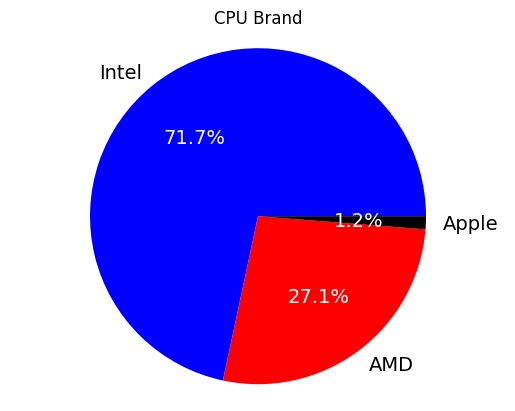

In [8]:
cpu_brand = pd.read_csv(
    "Laptop_Data.csv", skipinitialspace=True, usecols=['Processor_Brand'])
brand = cpu_brand.to_numpy()
brand_count = [0, 0, 0]
brand_type = ["Intel", "AMD", "Apple"]
for i in brand:
    if i == 'Intel':
        brand_count[0] += 1
    elif i == "AMD":
        brand_count[1] += 1
    else:
        brand_count[2] += 1
    
_,_,chart = plt.pie(brand_count,labels= brand_type,autopct='%1.1f%%', startangle=0,colors=['blue','red','black'], textprops={'fontsize': 14})
plt.title('CPU Brand')
plt.axis('equal')

for autotext in chart:
    autotext.set_color('white')
    autotext.set_size('14')
plt.show()

# กราฟแสดง CPU แต่ระรุ่นมีจำนวนเท่าไหร่

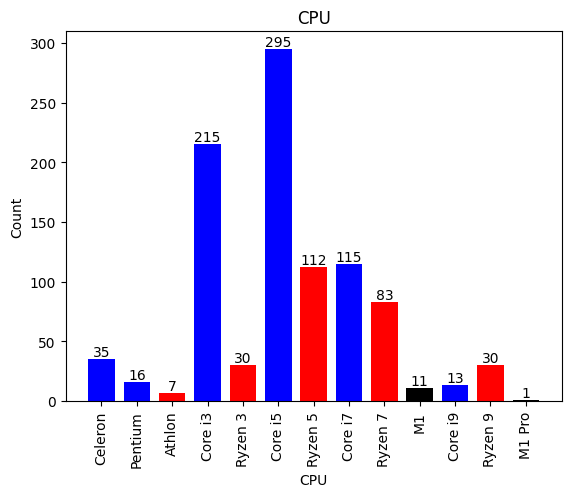

In [9]:
processor_name=['Celeron','Pentium','Athlon','Core i3','Ryzen 3','Core i5','Ryzen 5','Core i7','Ryzen 7','M1','Core i9','Ryzen 9','M1 Pro']
barplot = plt.bar(processor_name, processor_count,width=0.75,color = ['blue','blue','red','blue','red','blue','red','blue','red','black','blue','red','black'])
plt.bar_label(barplot,labels=processor_count,label_type='edge')
plt.title("CPU")
plt.xlabel('CPU')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# กราฟแสดงแรมที่มีบนโน๊ตบุ๊ค

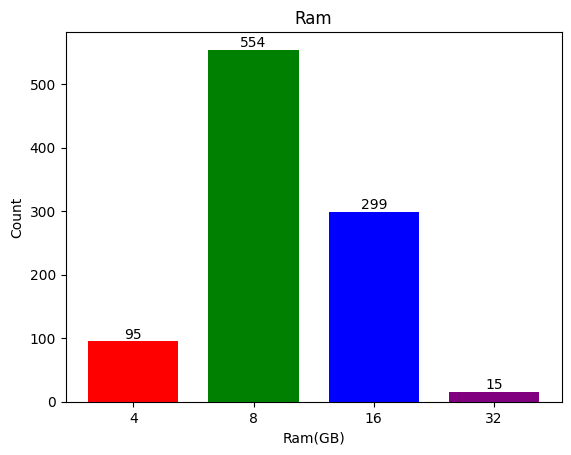

In [10]:
ram = [4, 8, 16, 32]
ram_count = [0, 0, 0, 0]
for i in range(0, len(data)):
    temp_data = data[i][6]
    if temp_data == 4:
        ram_count[0] += 1
    elif temp_data == 8:
        ram_count[1] += 1
    elif temp_data == 16:
        ram_count[2] += 1
    elif temp_data == 32:
        ram_count[3] += 1
ram = ['4','8', '16', '32']
barplot = plt.bar(ram, ram_count,width=0.75,color = ['red','green','blue','purple'])
plt.bar_label(barplot,labels=ram_count,label_type='edge')
plt.title("Ram")
plt.xlabel('Ram(GB)')
plt.ylabel('Count')
plt.show()
